<a href="https://colab.research.google.com/github/junieberry/NLP-withPyTorch/blob/main/03_BasicNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/nlp-with-pytorch

/content/drive/MyDrive/nlp-with-pytorch


In [2]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


## 3.1 퍼셉트론

- 입력 x
- 출력 y
- 가중치 w
- 절편 b
- 활성화 함수 f

`y=f(wx+b)`

이때 wx+b는 affine transform

In [4]:
class Perceptron(nn.Module):
  
  ## input_dim = 입력 차원
  def __init__(self, input_dim):
    super(Perceptron, self).__init__()

    ##nn.Linear은 선형 회귀 모델
    ## 가중치, 절편 및 아핀 변환 수행
    self.fc1 = nn.Linear(input_dim, 1)
  
  ## x_in.shape = (batch, feature)
  def forward(self, x_in):
    return torch.sigmoid(self.fc1(x_in)).squeeze()


## 3.2 활성화 함수

### 3.2.1 시그모이드

- 입력 범위 내에서 빠르게 포화됨
- 미분 값이 작아 gradient vanishing 현상
- 출력의 중심이 0이 아니어서 gradient 업데이트가 비효율적으로 됨
- 보통 마지막에 사용

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


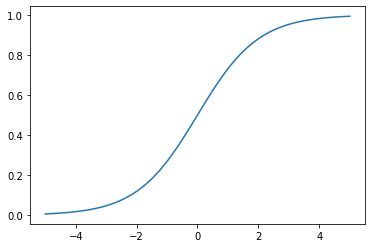

In [6]:
x = torch.range(-5, 5, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()


## 3.2.2 하이퍼블릭 탄젠트

- 시그모이드의 선형 변환
- 역시 gradient vanising 현상 발생
- 출력의 중심이 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


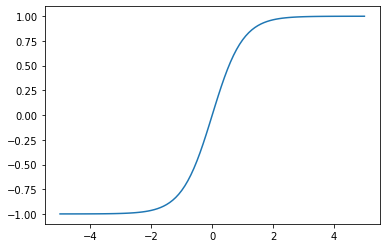

In [7]:
x = torch.range(-5, 5, 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### 3.2.3 렐루

- 0보다 작은 값은 무시해서 연산이 빠름
- 하지만 값이 음수이면 학습이 안됨
- 또한 기울기가 1이어서 gradient vanishing 현상 방지

하지만 신경망의 특정 출력이 0이 되면 돌아오지 않아 (dead ReLU) LeakyReLU나 PReLU 같은 해결 방안 탄생

### 3.2.4 Softmax

- 모든 출력의 합으로 각 출력을 나눠 이산 확률 분포를 만듦
- 분류 작업의 출력 해석에 용이
- 보통 categorical cross entropy와 사용

In [8]:
softmax = nn.Softmax(dim = 1)
x = torch.randn(1, 3)
y = softmax(x)

print(x)
print(y)
print(torch.sum(y, dim=1))

tensor([[ 1.4538, -0.3125,  0.8050]])
tensor([[0.5904, 0.1009, 0.3086]])
tensor([1.])


## 3.3 손실 함수

### 3.3.1 평균 제급 오차 손실 (mean squared error)

- 예측과 타깃값의 차이를 제곱해서 평균낸 값
- 출력과 타깃이 연속값인 회귀 문제에서 사용

In [9]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3,5)
targets = torch.randn(3,5)

loss = mse_loss(outputs, targets)
print(loss)

tensor(2.7150)


### 3.3.2 범주형 크로스 엔트로피 (categorical cross-entropy)

- 출력을 클래스 소속 확률에 대한 예측으로 이해하는 다중 분류 문제에 사용
- 하나의 클래스만 정답인 원-핫 벡터

In [10]:
ce_loss = nn.CrossEntropyLoss()
output = torch.randn(3, 5)

## target은 정답 인덱스로 이루어져 있음
target = torch.tensor([1,0,3], dtype=torch.int64)
loss = ce_loss(output, target)

print(loss)

tensor(2.4628)


### 3.3.3 이진 크로스 엔트로피 (binary cross entropy)

- 이진 분류 분제

In [11]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
output = sigmoid(torch.randn(4, 1))
target = torch.tensor([1,0,1,0], dtype=torch.float32).view(4,1)

loss = bce_loss(output, target)
print(loss)

tensor(0.7968)


## 3.4 지도 학습 훈련

1. 데이터 생성
2. 모델 선택
3. 결정 경계를 적용해 확률을 클래스로 변환
4. 손실 함수 선택
5. 옵티마이저 선택
6. 그레디언트 기반의 지도 학습

**지도학습 과정**

손실의 기울기는 모델 파라미터를 얼마나 많이 바꿔야 하는지를 나타냄

1. 그레디언트 초기화
2. 입력에 대한 출력 계산
3. 손실 계산
4. 기울기 역전파
5. 그레디언트 갱신

**배치와 에포크**

전체 훈련 데이터셋은 배치로 분할
하나의 데이터셋에서 모든 배치를 반복하면 하나의 에포크가 됨



In [ ]:
## 각 epoch는 전체 훈련 데이터 사용
for epoch_i in range(epochs):
  ## epoch 내부는 배치 수행!
  for batch_i in range(batches):

    ## 1. 데이터 가져오기
    x_data, y_target =get_toy_data(batch_size)

    ## 2. 그레디언트 초기화
    perceptrion.zero_grad()

    ## 3. forward 계산
    y_pred = perceptron(x_data, apply_sigmoidge=True)

    ## 4. 손실 계산
    loss = bce_loss(y_pred, y_target)

    ## 5. backward 계산
    loss.backward()

    ## 6. 옵티마이저로 업데이트
    optimizer.step()


## 3.5 부가적인 훈련 개념

### 3.5.1 평가 지표

모델의 성능을 올바르게 측정하기 위해 필요

- 정확도

### 3.5.2 데이터 분할

모델의 성능을 올바르게 측정하기 위해 필요

모델의 최종 목표는 일반화!

따라서 진짜 모델의 성능은 처음 보는 데이터를 사용해 평가해야함!


1. train, validation, test 데이터 셋으로 나누기
2. k-fold cross validation 사용

### 3.5.3 Ealry stopping

에포크마다 검증 데이터셋에 대한 성능을 기록하고 더 좋아지지 않으면 학습을 멈춤

### 3.5.5 Regularization

오컴의 면도날 이론

```
간단한 설명이 복잡한 것보다 낫다!
```

- L2 규제 (옵티마이저의 weight_decay)
- L1 규제 (희소한 솔루션)